In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# LOAD DATASET

In [2]:
path = r'C:\Users\adity\Downloads\adult_sal.csv'
df = pd.read_csv(path)
df.head()

age workclass  fnlwgt     education  education.num marital.status  \
0   90         ?   77053       HS-grad              9        Widowed   
1   82   Private  132870       HS-grad              9        Widowed   
2   66         ?  186061  Some-college             10        Widowed   
3   54   Private  140359       7th-8th              4       Divorced   
4   41   Private  264663  Some-college             10      Separated   

          occupation   relationship   race     sex  capital.gain  \
0                  ?  Not-in-family  White  Female             0   
1    Exec-managerial  Not-in-family  White  Female             0   
2                  ?      Unmarried  Black  Female             0   
3  Machine-op-inspct      Unmarried  White  Female             0   
4     Prof-specialty      Own-child  White  Female             0   

   capital.loss  hours.per.week native.country income  
0          4356              40  United-States  <=50K  
1          4356              18  United-States  <=50K  
2          4356              40  United-States  <=50K  
3          3900              40  United-States  <=50K  
4          3900              40  United-States  <=50K

# Problem statement for classification
# Target is to classify where a person can earn more tha 50K? , dependent/target feature is "income"

# PREPROCESSING

In [3]:
df.shape

(32560, 15)

In [4]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32560 non-null  int64 
 1   workclass       32560 non-null  object
 2   fnlwgt          32560 non-null  int64 
 3   education       32560 non-null  object
 4   education.num   32560 non-null  int64 
 5   marital.status  32560 non-null  object
 6   occupation      32560 non-null  object
 7   relationship    32560 non-null  object
 8   race            32560 non-null  object
 9   sex             32560 non-null  object
 10  capital.gain    32560 non-null  int64 
 11  capital.loss    32560 non-null  int64 
 12  hours.per.week  32560 non-null  int64 
 13  native.country  32560 non-null  object
 14  income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


age        fnlwgt  education.num  capital.gain  capital.loss  \
count  32560.000000  3.256000e+04   32560.000000  32560.000000  32560.000000   
mean      38.582156  1.897780e+05      10.080713   1077.681941     87.306511   
std       13.640332  1.055516e+05       2.572753   7385.403083    402.966116   
min       17.000000  1.228500e+04       1.000000      0.000000      0.000000   
25%       28.000000  1.178242e+05       9.000000      0.000000      0.000000   
50%       37.000000  1.783560e+05      10.000000      0.000000      0.000000   
75%       48.000000  2.370545e+05      12.000000      0.000000      0.000000   
max       90.000000  1.484705e+06      16.000000  99999.000000   4356.000000   

       hours.per.week  
count    32560.000000  
mean        40.438084  
std         12.347099  
min          1.000000  
25%         40.000000  
50%         40.000000  
75%         45.000000  
max         99.000000

In [5]:
#replacing '?' with null vals
df = df.replace('?',np.nan)
df

age workclass  fnlwgt     education  education.num      marital.status  \
0       90       NaN   77053       HS-grad              9             Widowed   
1       82   Private  132870       HS-grad              9             Widowed   
2       66       NaN  186061  Some-college             10             Widowed   
3       54   Private  140359       7th-8th              4            Divorced   
4       41   Private  264663  Some-college             10           Separated   
...    ...       ...     ...           ...            ...                 ...   
32555   53   Private  321865       Masters             14  Married-civ-spouse   
32556   22   Private  310152  Some-college             10       Never-married   
32557   27   Private  257302    Assoc-acdm             12  Married-civ-spouse   
32558   40   Private  154374       HS-grad              9  Married-civ-spouse   
32559   58   Private  151910       HS-grad              9             Widowed   

              occupation   relationship   race     sex  capital.gain  \
0                    NaN  Not-in-family  White  Female             0   
1        Exec-managerial  Not-in-family  White  Female             0   
2                    NaN      Unmarried  Black  Female             0   
3      Machine-op-inspct      Unmarried  White  Female             0   
4         Prof-specialty      Own-child  White  Female             0   
...                  ...            ...    ...     ...           ...   
32555    Exec-managerial        Husband  White    Male             0   
32556    Protective-serv  Not-in-family  White    Male             0   
32557       Tech-support           Wife  White  Female             0   
32558  Machine-op-inspct        Husband  White    Male             0   
32559       Adm-clerical      Unmarried  White  Female             0   

       capital.loss  hours.per.week native.country income  
0              4356              40  United-States  <=50K  
1              4356              18  United-States  <=50K  
2              4356              40  United-States  <=50K  
3              3900              40  United-States  <=50K  
4              3900              40  United-States  <=50K  
...             ...             ...            ...    ...  
32555             0              40  United-States   >50K  
32556             0              40  United-States  <=50K  
32557             0              38  United-States  <=50K  
32558             0              40  United-States   >50K  
32559             0              40  United-States  <=50K  

[32560 rows x 15 columns]

In [6]:
#Investigating null values
print(df.isna().sum())

age                  0
workclass         1836
fnlwgt               0
education            0
education.num        0
marital.status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital.gain         0
capital.loss         0
hours.per.week       0
native.country     583
income               0
dtype: int64


In [7]:
#Columns in dataset
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education.num',
       'marital.status', 'occupation', 'relationship', 'race', 'sex',
       'capital.gain', 'capital.loss', 'hours.per.week', 'native.country',
       'income'],
      dtype='object')

In [8]:
#Finding count/frequency of all categories in each coulumns

unique = df['marital.status'].unique()
print(unique)
print(df['marital.status'].value_counts())

unique = df['workclass'].unique()
print(unique)
print(df['workclass'].value_counts())

unique = df['education'].unique()
print(unique)
print(df['education'].value_counts())

unique = df['occupation'].unique()
print(unique)
print(df['occupation'].value_counts())

unique = df['relationship'].unique()
print(unique)
print(df['relationship'].value_counts())

unique = df['race'].unique()
print(unique)
print(df['race'].value_counts())

unique = df['sex'].unique()
print(unique)
print(df['sex'].value_counts())

unique = df['native.country'].unique()
print(unique)
print(df['native.country'].value_counts())

unique = df['income'].unique()
print(unique)
print(df['income'].value_counts())

['Widowed' 'Divorced' 'Separated' 'Never-married' 'Married-civ-spouse'
 'Married-spouse-absent' 'Married-AF-spouse']
marital.status
Married-civ-spouse       14976
Never-married            10682
Divorced                  4443
Separated                 1025
Widowed                    993
Married-spouse-absent      418
Married-AF-spouse           23
Name: count, dtype: int64
[nan 'Private' 'State-gov' 'Federal-gov' 'Self-emp-not-inc' 'Self-emp-inc'
 'Local-gov' 'Without-pay' 'Never-worked']
workclass
Private             22695
Self-emp-not-inc     2541
Local-gov            2093
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: count, dtype: int64
['HS-grad' 'Some-college' '7th-8th' '10th' 'Doctorate' 'Prof-school'
 'Bachelors' 'Masters' '11th' 'Assoc-acdm' 'Assoc-voc' '1st-4th' '5th-6th'
 '12th' '9th' 'Preschool']
education
HS-grad         10500
Some-college     7291
Bachelors        5355
Masters         

In [9]:
#Filling null values
print(df['workclass'].mode()[0]) #mode value of column
df['workclass']=df['workclass'].fillna(df['workclass'].mode()[0])

print(df['occupation'].mode()[0])
df['occupation'] = df['occupation'].fillna(df['occupation'].mode()[0])

print(df['native.country'].mode()[0])
df['native.country'] = df['native.country'].fillna(df['native.country'].mode()[0])

Private
Prof-specialty
United-States


In [10]:
#Validating if there's null values after filling up with mode values
df.isna().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

In [12]:
print(list(df.columns))

['age', 'workclass', 'fnlwgt', 'education', 'education.num', 'marital.status', 'occupation', 'relationship', 'race', 'sex', 'capital.gain', 'capital.loss', 'hours.per.week', 'native.country', 'income']


# FEATURE ENGINEERING --> ENCODNG DATA

In [13]:
#Encoding of data for categorical columns

#Encoding Independent features
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

cols = ['workclass', 'education', 'marital.status', 'occupation', 'relationship', 'race', 'sex', 'native.country']
for i in range(len(cols)):
    df[cols[i]] = le.fit_transform(df[cols[i]].values)

#Encoding Dependent features
df['income'] = le.fit_transform(df.loc[:,'income'].values)

In [14]:
#Validating whether categorical data converted into numerical features data
df

age  workclass  fnlwgt  education  education.num  marital.status  \
0       90          3   77053         11              9               6   
1       82          3  132870         11              9               6   
2       66          3  186061         15             10               6   
3       54          3  140359          5              4               0   
4       41          3  264663         15             10               5   
...    ...        ...     ...        ...            ...             ...   
32555   53          3  321865         12             14               2   
32556   22          3  310152         15             10               4   
32557   27          3  257302          7             12               2   
32558   40          3  154374         11              9               2   
32559   58          3  151910         11              9               6   

       occupation  relationship  race  sex  capital.gain  capital.loss  \
0               9             1     4    0             0          4356   
1               3             1     4    0             0          4356   
2               9             4     2    0             0          4356   
3               6             4     4    0             0          3900   
4               9             3     4    0             0          3900   
...           ...           ...   ...  ...           ...           ...   
32555           3             0     4    1             0             0   
32556          10             1     4    1             0             0   
32557          12             5     4    0             0             0   
32558           6             0     4    1             0             0   
32559           0             4     4    0             0             0   

       hours.per.week  native.country  income  
0                  40              38       0  
1                  18              38       0  
2                  40              38       0  
3                  40              38       0  
4                  40              38       0  
...               ...             ...     ...  
32555              40              38       1  
32556              40              38       0  
32557              38              38       0  
32558              40              38       1  
32559              40              38       0  

[32560 rows x 15 columns]

# CORRELATION AMONG FEATURES

In [15]:
#Correaltion to find strong relationship b/w all features
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

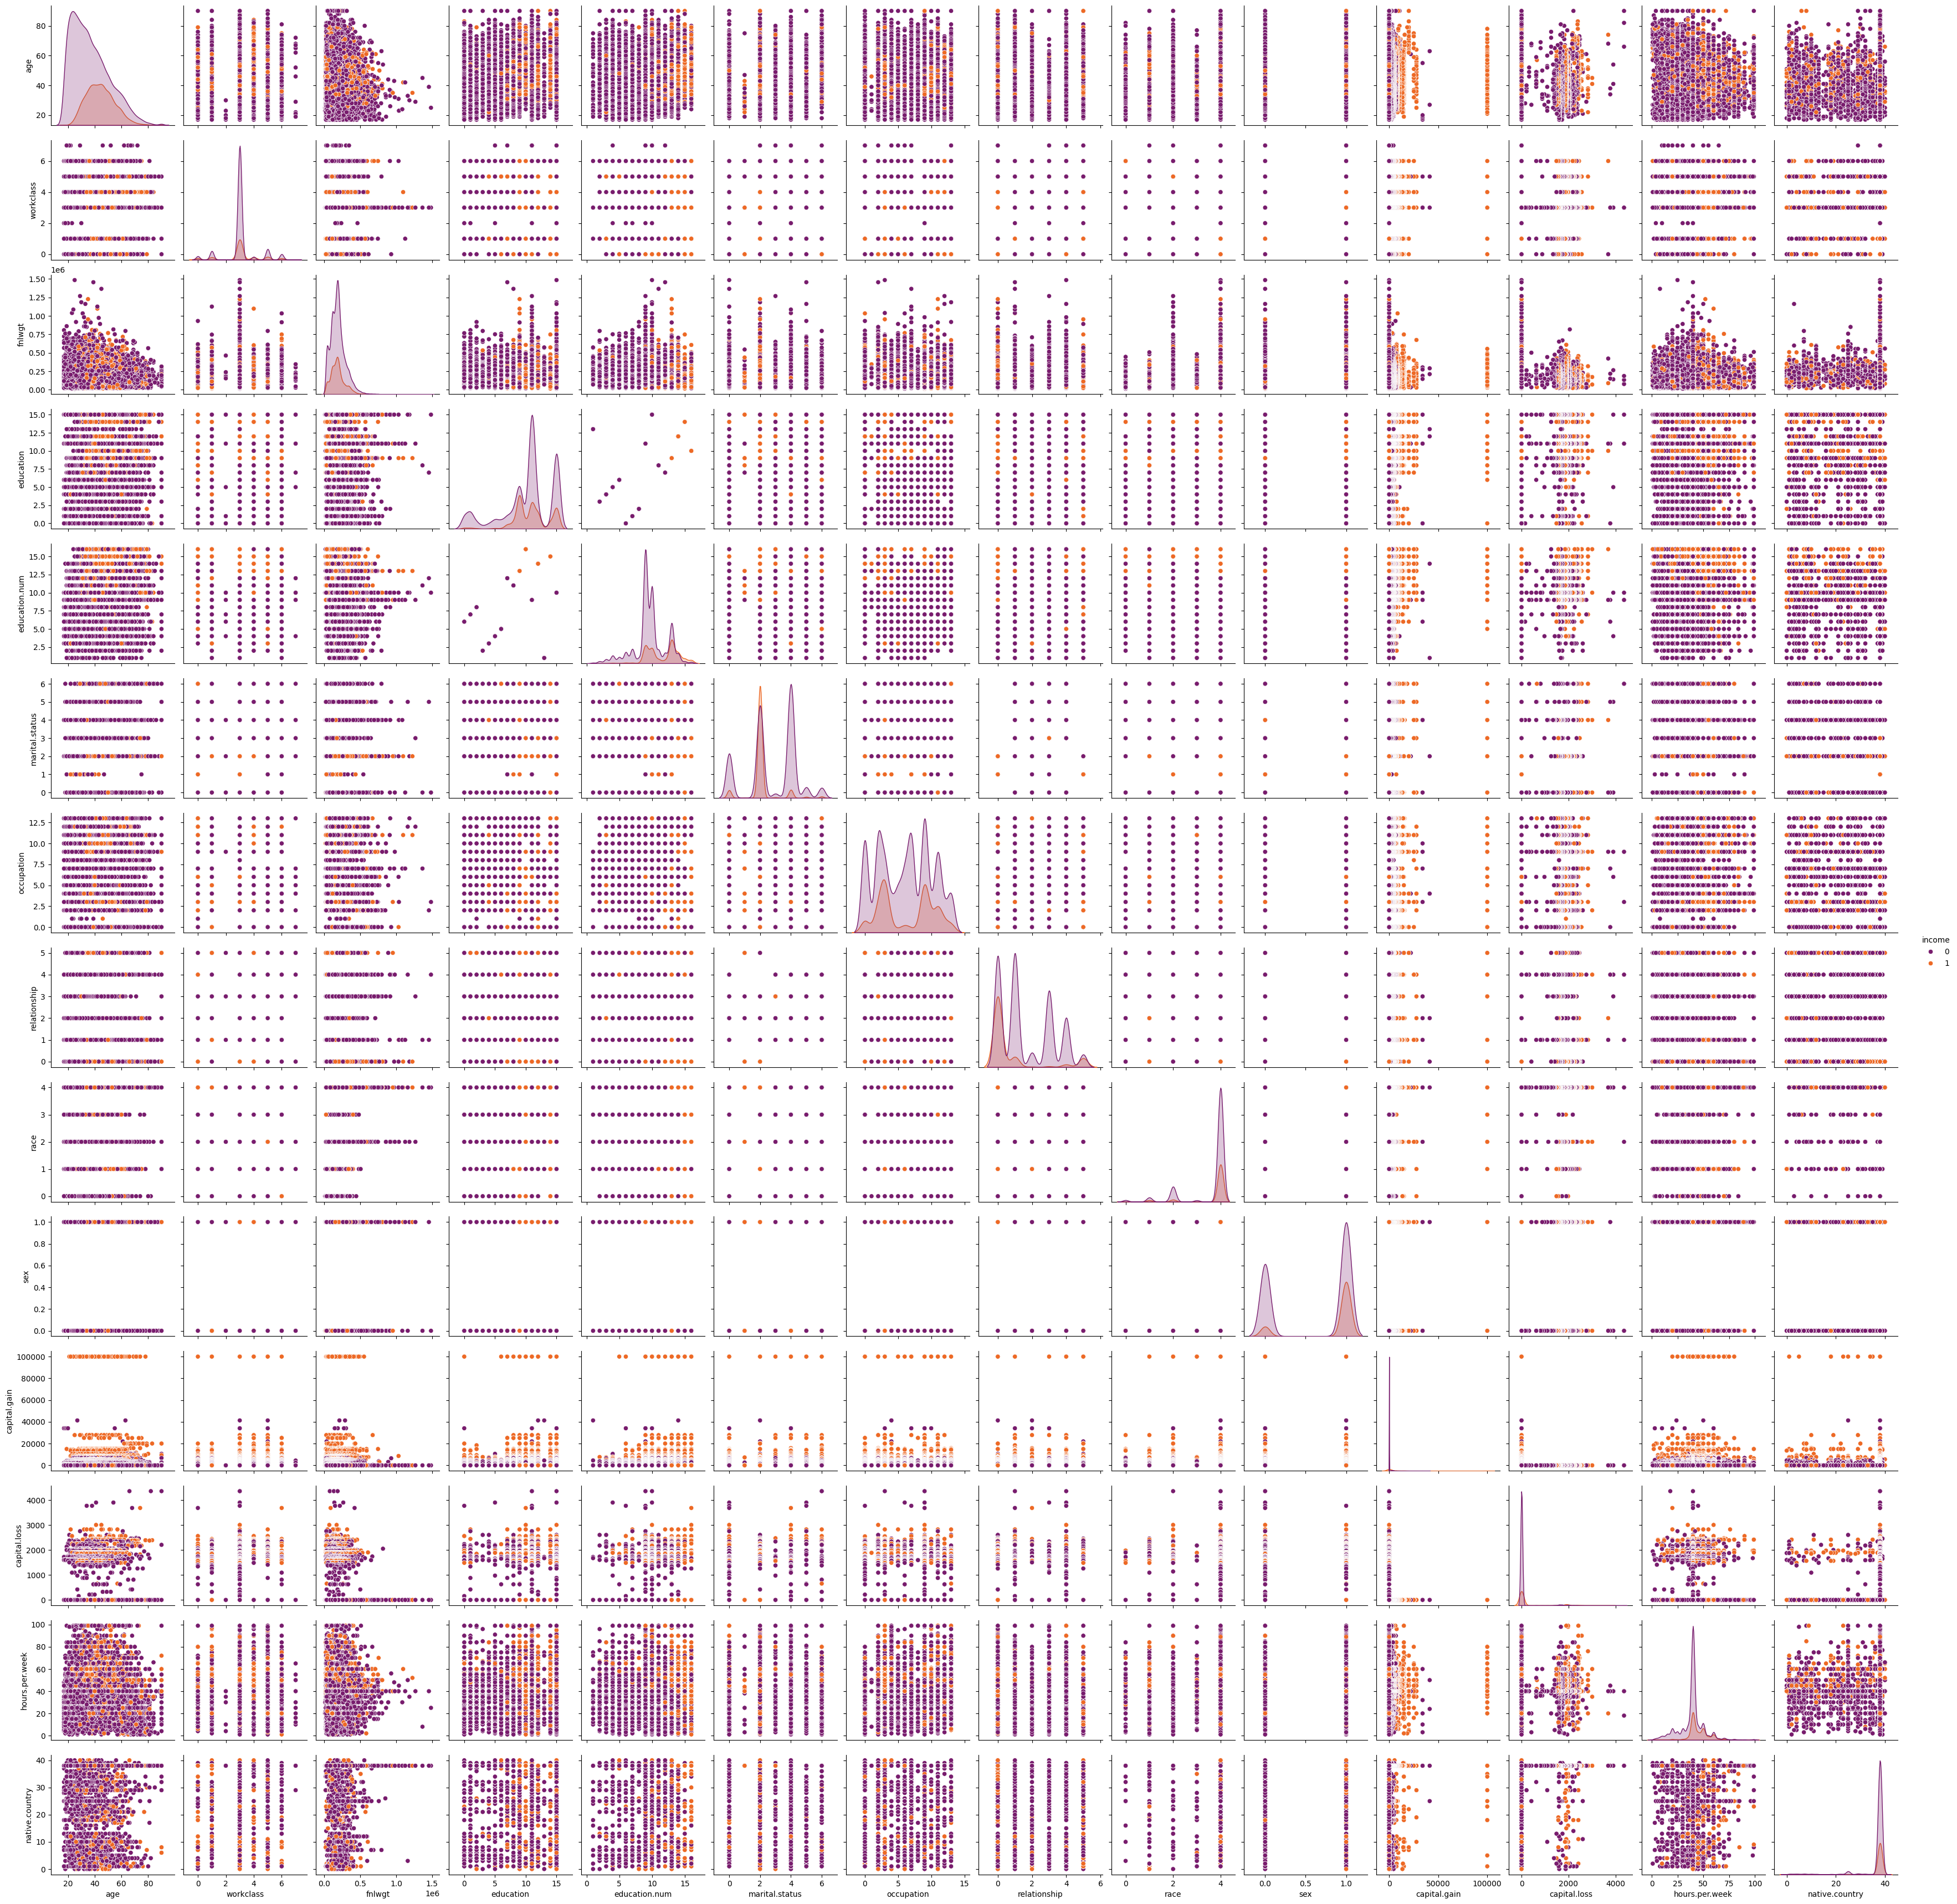

In [56]:
#plotting pairplot to find relationship

sns.pairplot(df, hue='income', palette='inferno')

<Axes: >

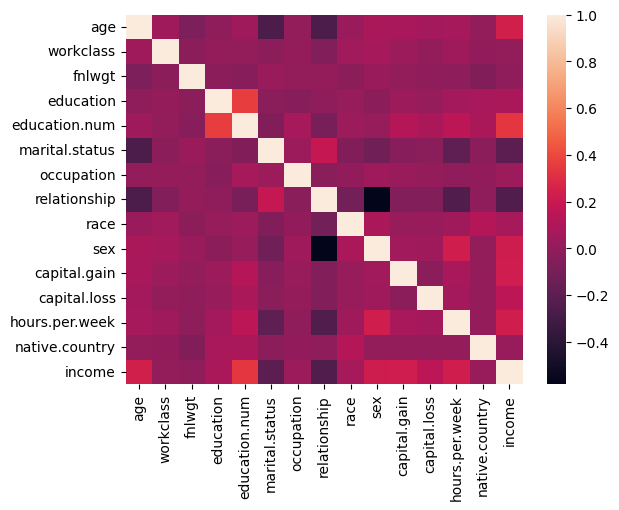

In [16]:
#heatmap for investigation of correlation
sns.heatmap(df.corr())

In [17]:
#having another dataframe on same dataset with all preprocessing done but no label encoding applied
df_unencoded = pd.read_csv(path)

df_unencoded = df_unencoded.replace('?',np.nan)

print(df_unencoded['workclass'].mode()[0]) #mode value of column
df_unencoded['workclass'] = df_unencoded['workclass'].fillna(df['workclass'].mode()[0])

print(df_unencoded['occupation'].mode()[0])
df_unencoded['occupation'] = df_unencoded['occupation'].fillna(df_unencoded['occupation'].mode()[0])

print(df_unencoded['native.country'].mode()[0])
df_unencoded['native.country'] = df_unencoded['native.country'].fillna(df_unencoded['native.country'].mode()[0])

Private
Prof-specialty
United-States


In [18]:
df_unencoded.head(6)

age workclass  fnlwgt     education  education.num marital.status  \
0   90         3   77053       HS-grad              9        Widowed   
1   82   Private  132870       HS-grad              9        Widowed   
2   66         3  186061  Some-college             10        Widowed   
3   54   Private  140359       7th-8th              4       Divorced   
4   41   Private  264663  Some-college             10      Separated   
5   34   Private  216864       HS-grad              9       Divorced   

          occupation   relationship   race     sex  capital.gain  \
0     Prof-specialty  Not-in-family  White  Female             0   
1    Exec-managerial  Not-in-family  White  Female             0   
2     Prof-specialty      Unmarried  Black  Female             0   
3  Machine-op-inspct      Unmarried  White  Female             0   
4     Prof-specialty      Own-child  White  Female             0   
5      Other-service      Unmarried  White  Female             0   

   capital.loss  hours.per.week native.country income  
0          4356              40  United-States  <=50K  
1          4356              18  United-States  <=50K  
2          4356              40  United-States  <=50K  
3          3900              40  United-States  <=50K  
4          3900              40  United-States  <=50K  
5          3770              45  United-States  <=50K

In [19]:
df_unencoded['workclass']=df_unencoded['workclass'].fillna(df_unencoded['workclass'].mode()[0])
df_unencoded

age workclass  fnlwgt     education  education.num      marital.status  \
0       90         3   77053       HS-grad              9             Widowed   
1       82   Private  132870       HS-grad              9             Widowed   
2       66         3  186061  Some-college             10             Widowed   
3       54   Private  140359       7th-8th              4            Divorced   
4       41   Private  264663  Some-college             10           Separated   
...    ...       ...     ...           ...            ...                 ...   
32555   53   Private  321865       Masters             14  Married-civ-spouse   
32556   22   Private  310152  Some-college             10       Never-married   
32557   27   Private  257302    Assoc-acdm             12  Married-civ-spouse   
32558   40   Private  154374       HS-grad              9  Married-civ-spouse   
32559   58   Private  151910       HS-grad              9             Widowed   

              occupation   relationship   race     sex  capital.gain  \
0         Prof-specialty  Not-in-family  White  Female             0   
1        Exec-managerial  Not-in-family  White  Female             0   
2         Prof-specialty      Unmarried  Black  Female             0   
3      Machine-op-inspct      Unmarried  White  Female             0   
4         Prof-specialty      Own-child  White  Female             0   
...                  ...            ...    ...     ...           ...   
32555    Exec-managerial        Husband  White    Male             0   
32556    Protective-serv  Not-in-family  White    Male             0   
32557       Tech-support           Wife  White  Female             0   
32558  Machine-op-inspct        Husband  White    Male             0   
32559       Adm-clerical      Unmarried  White  Female             0   

       capital.loss  hours.per.week native.country income  
0              4356              40  United-States  <=50K  
1              4356              18  United-States  <=50K  
2              4356              40  United-States  <=50K  
3              3900              40  United-States  <=50K  
4              3900              40  United-States  <=50K  
...             ...             ...            ...    ...  
32555             0              40  United-States   >50K  
32556             0              40  United-States  <=50K  
32557             0              38  United-States  <=50K  
32558             0              40  United-States   >50K  
32559             0              40  United-States  <=50K  

[32560 rows x 15 columns]

In [20]:
print(df_unencoded['workclass'].value_counts())

workclass
Private             22695
Self-emp-not-inc     2541
Local-gov            2093
3                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: count, dtype: int64


In [21]:
print(df_unencoded['occupation'].value_counts())

occupation
Prof-specialty       5983
Craft-repair         4099
Exec-managerial      4066
Adm-clerical         3769
Sales                3650
Other-service        3295
Machine-op-inspct    2002
Transport-moving     1597
Handlers-cleaners    1370
Farming-fishing       994
Tech-support          928
Protective-serv       649
Priv-house-serv       149
Armed-Forces            9
Name: count, dtype: int64


In [22]:
print(df_unencoded['native.country'].value_counts())

native.country
United-States                 29752
Mexico                          643
Philippines                     198
Germany                         137
Canada                          121
Puerto-Rico                     114
El-Salvador                     106
India                           100
Cuba                             95
England                          90
Jamaica                          81
South                            80
China                            75
Italy                            73
Dominican-Republic               70
Vietnam                          67
Guatemala                        64
Japan                            62
Poland                           60
Columbia                         59
Taiwan                           51
Haiti                            44
Iran                             43
Portugal                         37
Nicaragua                        34
Peru                             31
Greece                           29
France       

# EDA & DATA ANALYSIS

Text(0.5, 1.0, 'Age Vs Income')

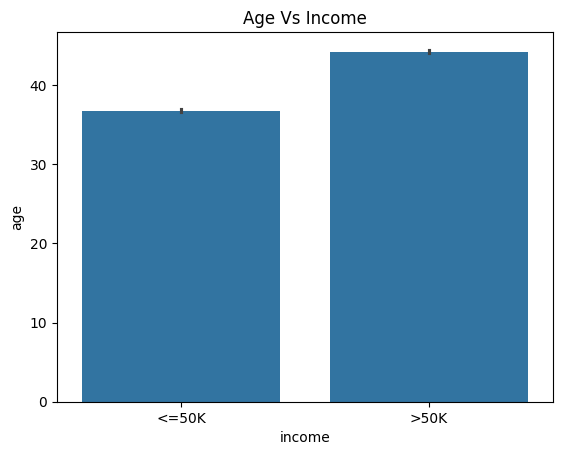

In [23]:
#relation b/w income age
sns.barplot(x='income', y='age', data=df_unencoded).set_title('Age Vs Income')

Text(0.5, 1.0, 'Education.Num Vs Income')

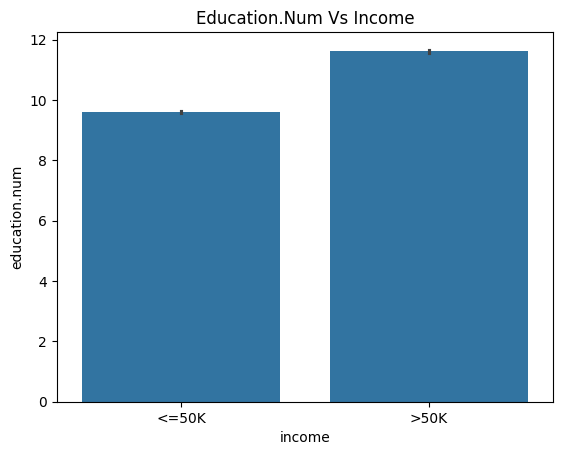

In [24]:
sns.barplot(x='income', y='education.num', data=df_unencoded).set_title('Education.Num Vs Income')

Text(0.5, 1.0, 'Age distribution Whites Vs Blacks')

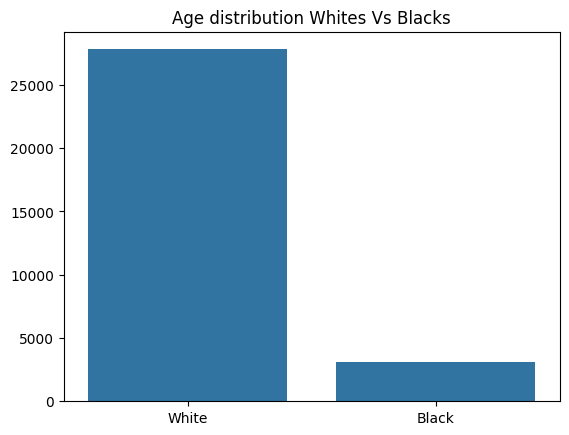

In [25]:
#Distribution of age
countofwhite = df_unencoded[df_unencoded['race']=='White'].loc[:,"income"]
countofblacks = df_unencoded[df_unencoded['race']=='Black'].loc[:,"income"]

sns.barplot(x=['White','Black'], y=[len(countofwhite), len(countofblacks)]).set_title('Age distribution Whites Vs Blacks')

20698
2737


Text(0.5, 1.0, 'Number of Blacks Vs Whites earn less than 50K')

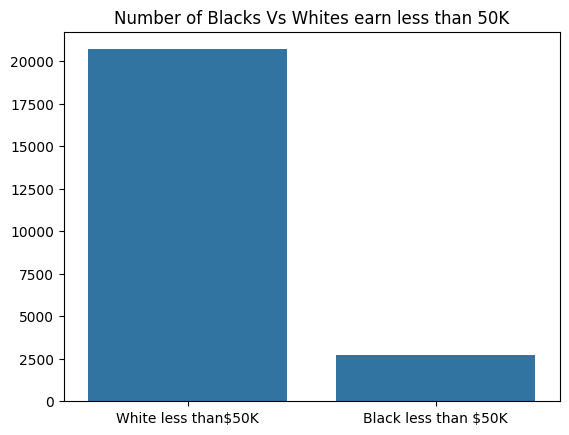

In [26]:
#Distribution of race where people are earning less than 50K
white_race_poor = df_unencoded[ (df_unencoded['race']=='White') & (df_unencoded['income']=='<=50K') ].loc[:,"income"]
countofwhite_poor = len(white_race_poor)

black_race_poor = df_unencoded[ (df_unencoded['race']=='Black') & (df_unencoded['income']=='<=50K') ].loc[:,"income"]
countofblack_poor = len(black_race_poor)

# 'White' 'Black' 'Asian-Pac-Islander' 'Other' 'Amer-Indian-Eskimo'
print(countofwhite_poor)
print(countofblack_poor)
sns.barplot(x=['White less than$50K', 'Black less than $50K'], y=[countofwhite_poor, countofblack_poor]).set_title('Number of Blacks Vs Whites earn less than 50K')


7117
387


Text(0.5, 1.0, 'Number of Blacks Vs Whites earn more than 50K')

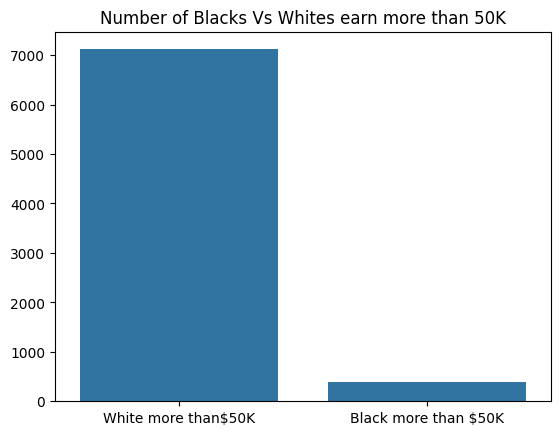

In [27]:
#Distribution of race where people are earning more than 50K
white_race_rich = df_unencoded[ (df_unencoded['race']=='White') & (df_unencoded['income']=='>50K') ].loc[:,"income"]
countofwhite_rich = len(white_race_rich)

black_race_rich = df_unencoded[ (df_unencoded['race']=='Black') & (df_unencoded['income']=='>50K') ].loc[:,"income"]
countofblack_rich = len(black_race_rich)

# 'White' 'Black' 'Asian-Pac-Islander' 'Other' 'Amer-Indian-Eskimo'
print(countofwhite_rich)
print(countofblack_rich)
sns.barplot(x=['White more than$50K', 'Black more than $50K'], y=[countofwhite_rich, countofblack_rich]).set_title('Number of Blacks Vs Whites earn more than 50K')


In [28]:
#Dropping non-important features
df = df.drop(['fnlwgt', 'marital.status','relationship','hours.per.week'],axis=1)

In [29]:
#Final cleaned and fully preprocessed dataframe
df

age  workclass  education  education.num  occupation  race  sex  \
0       90          3         11              9           9     4    0   
1       82          3         11              9           3     4    0   
2       66          3         15             10           9     2    0   
3       54          3          5              4           6     4    0   
4       41          3         15             10           9     4    0   
...    ...        ...        ...            ...         ...   ...  ...   
32555   53          3         12             14           3     4    1   
32556   22          3         15             10          10     4    1   
32557   27          3          7             12          12     4    0   
32558   40          3         11              9           6     4    1   
32559   58          3         11              9           0     4    0   

       capital.gain  capital.loss  native.country  income  
0                 0          4356              38       0  
1                 0          4356              38       0  
2                 0          4356              38       0  
3                 0          3900              38       0  
4                 0          3900              38       0  
...             ...           ...             ...     ...  
32555             0             0              38       1  
32556             0             0              38       0  
32557             0             0              38       0  
32558             0             0              38       1  
32559             0             0              38       0  

[32560 rows x 11 columns]

In [30]:
print( df_unencoded[ df_unencoded['income']=='<=50K' ]['workclass'].value_counts())
print(df['workclass'].value_counts())

workclass
Private             17732
Self-emp-not-inc     1817
3                    1645
Local-gov            1476
State-gov             945
Federal-gov           589
Self-emp-inc          494
Without-pay            14
Never-worked            7
Name: count, dtype: int64
workclass
3    24531
5     2541
1     2093
6     1298
4     1116
0      960
7       14
2        7
Name: count, dtype: int64


In [31]:
print( df_unencoded[ df_unencoded['income']=='>50K' ]['workclass'].value_counts())
print(df['workclass'].value_counts())

workclass
Private             4963
Self-emp-not-inc     724
Self-emp-inc         622
Local-gov            617
Federal-gov          371
State-gov            353
3                    191
Name: count, dtype: int64
workclass
3    24531
5     2541
1     2093
6     1298
4     1116
0      960
7       14
2        7
Name: count, dtype: int64


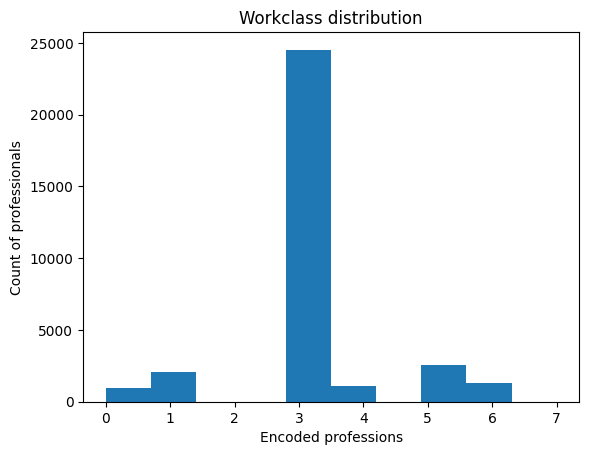

In [32]:
plt.hist(df['workclass'])
plt.title('Workclass distribution')
plt.xlabel('Encoded professions')
plt.ylabel('Count of professionals')
plt.show()

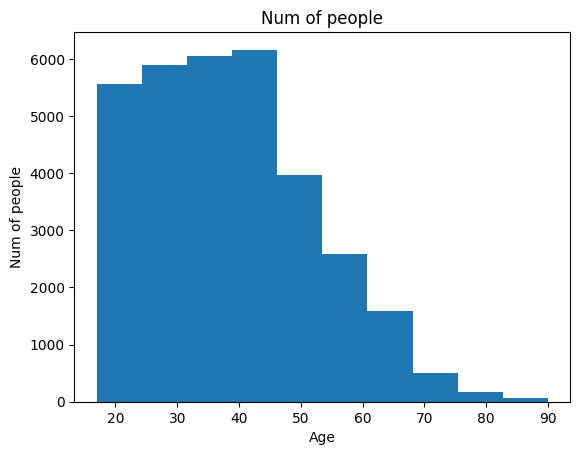

In [33]:
plt.hist(df['age'])
plt.title('Num of people')
plt.xlabel('Age')
plt.ylabel('Num of people')
plt.show()

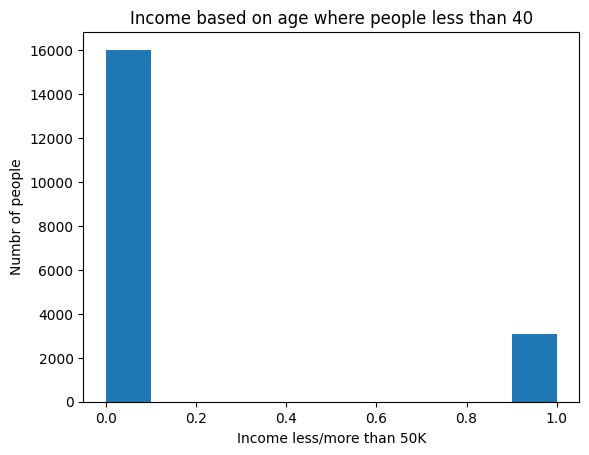

In [34]:
df_rich_young = df[ (df['age']<=40) ]
plt.hist(df_rich_young['income'])
plt.title('Income based on age where people less than 40')
plt.xlabel('Income less/more than 50K')
plt.ylabel('Numbr of people')
plt.show()

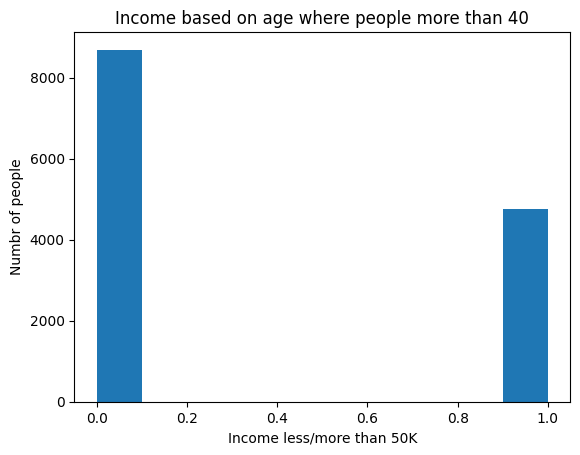

In [35]:
df_rich_old = df[ (df['age']>40) ]
plt.hist(df_rich_old['income'])
plt.title('Income based on age where people more than 40')
plt.xlabel('Income less/more than 50K')
plt.ylabel('Numbr of people')
plt.show()

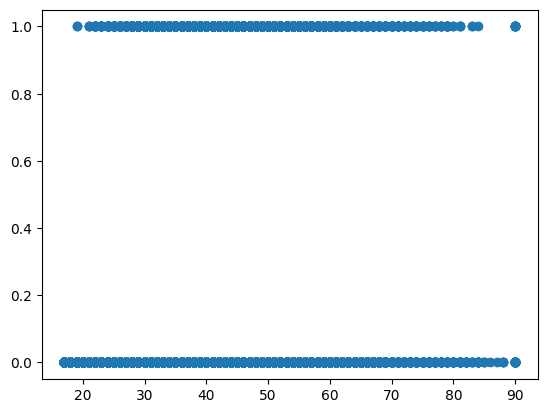

In [36]:
#Age2 Vs income data distribution
plt.scatter(df.age, df.income)
plt.show()

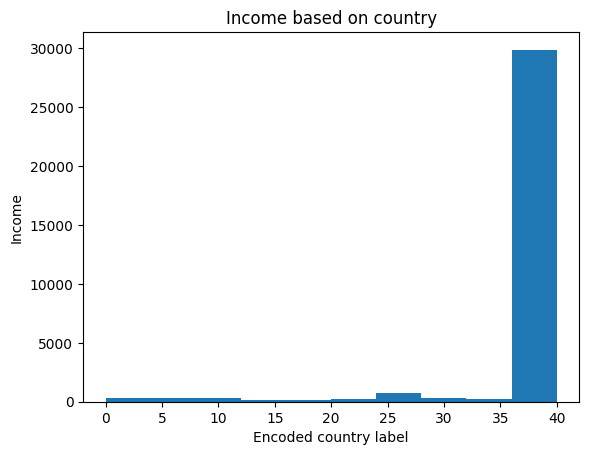

In [37]:
# income based on native country
plt.hist(df['native.country'])
plt.title('Income based on country')
plt.xlabel('Encoded country label')
plt.ylabel('Income')
plt.show()

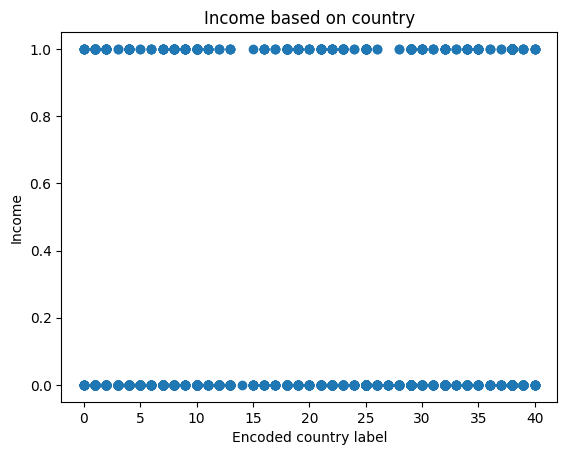

In [38]:
#Age2 Vs income data distribution
plt.scatter(df['native.country'], df.income)
plt.title('Income based on country')
plt.xlabel('Encoded country label')
plt.ylabel('Income')
plt.show()

In [39]:
print(df_unencoded['education'].value_counts())
print(df['education'].value_counts())

education
HS-grad         10500
Some-college     7291
Bachelors        5355
Masters          1723
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           646
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           333
1st-4th           168
Preschool          51
Name: count, dtype: int64
education
11    10500
15     7291
9      5355
12     1723
8      1382
1      1175
7      1067
0       933
5       646
14      576
6       514
2       433
10      413
4       333
3       168
13       51
Name: count, dtype: int64


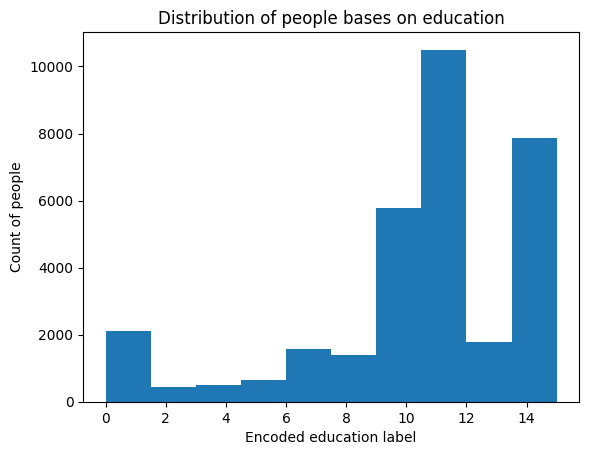

In [40]:
plt.hist(df['education'])
plt.title('Distribution of people bases on education')
plt.xlabel('Encoded education label')
plt.ylabel('Count of people')
plt.show()

#Most people are high school grads & some college

In [ ]:
#So we will make independent vars as age, native country
#Dependent vars will be income

In [41]:
X=df.loc[:,["age", "native.country"]] #age , native.country
y=df.loc[:, "income"] #income

In [42]:
X

age  native.country
0       90              38
1       82              38
2       66              38
3       54              38
4       41              38
...    ...             ...
32555   53              38
32556   22              38
32557   27              38
32558   40              38
32559   58              38

[32560 rows x 2 columns]

In [43]:
y

0        0
1        0
2        0
3        0
4        0
        ..
32555    1
32556    0
32557    0
32558    1
32559    0
Name: income, Length: 32560, dtype: int32

In [44]:
#test train split
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X,y, test_size=0.2)


In [45]:
print(Xtrain)
print(Xtest)
print(ytrain)
print(ytest)

       age  native.country
13982   62              10
25991   32              38
14295   17              38
20097   43              38
10981   53              38
...    ...             ...
23704   21              38
11958   43              38
28303   44              38
13790   50              38
10709   26              38

[26048 rows x 2 columns]
       age  native.country
4455    50              38
3217    39              38
31675   29              38
9978    43              38
13084   27              38
...    ...             ...
4513    26              38
4541    62              38
31469   59              38
6685    21              38
23216   22              38

[6512 rows x 2 columns]
13982    0
25991    0
14295    0
20097    0
10981    0
        ..
23704    0
11958    0
28303    0
13790    0
10709    0
Name: income, Length: 26048, dtype: int32
4455     0
3217     1
31675    0
9978     0
13084    0
        ..
4513     0
4541     1
31469    1
6685     0
23216    0
Name: income, Len

# FEATURE SCALING --> Standardization

In [46]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
scx = StandardScaler()

Xtrainsc = scx.fit_transform(Xtrain)
Xtestsc = scx.fit_transform(Xtest)

#we dont scale dependent vars in classfication
#ytrainsc = scx.fit_transform(ytrain.values.reshape(-1,1))
#ytestsc = scx.fit_transform(ytest.values.reshape(-1,1))

# MODEL DEVELOPEMENT/TRAINING 

# LOGISTIC REGRESSION
# NAIVE BAYES
# KNN
# SVC (radial basis function)
# SVC (linear)
# Decision Tree Classifier

In [47]:
#Model building
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state=0)
classifier.fit(Xtrain, ytrain)

LogisticRegression(random_state=0)

In [48]:
#predicted values in test set
y_pred = classifier.predict(Xtest)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [49]:
# Looking into predicted results
pd.DataFrame(y_pred, columns=['cols']).value_counts()

cols
0       6403
1        109
Name: count, dtype: int64

In [50]:
#Looking into actual results
ytest.value_counts()

income
0    4936
1    1576
Name: count, dtype: int64

In [51]:
#Model building on feature scaled values
from sklearn.linear_model import LogisticRegression
classifier1 = LogisticRegression(random_state=0)
classifier1.fit(Xtrainsc, ytrain)

LogisticRegression(random_state=0)

In [52]:
#predicted values on feature scaled test set
y_pred1 = classifier1.predict(Xtestsc)
y_pred1

array([0, 0, 0, ..., 0, 0, 0])

In [53]:
#looking into prediction done on feature scaled test set
pd.DataFrame(y_pred1, columns=['cols']).value_counts()

cols
0       6403
1        109
Name: count, dtype: int64

In [54]:
#Confusion matrix on non feature scaled values
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(ytest, y_pred)
print(cm)
accuracy_score(ytest,y_pred)

[[4850   86]
 [1553   23]]


0.7483108108108109

In [55]:
#Confusion matrix on feature scaled values
cm1 = confusion_matrix(ytest, y_pred)
print(cm1)
accuracy_score(ytest,y_pred1)

[[4850   86]
 [1553   23]]


0.7483108108108109

In [56]:
# There's very little diff (10^-4 order) b/w feature scaled model and not feature scaled model

In [57]:
#Naive bayes Classifier
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(Xtrainsc,ytrain)

GaussianNB()

In [58]:
ypred = classifier.predict(Xtestsc)
ypred

array([0, 0, 0, ..., 0, 0, 0])

In [59]:
ypred.shape

(6512,)

In [60]:
ytest.shape

(6512,)

In [61]:
# Model performance Confusion matrix & accuracy
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(ytest,ypred)
print(cm)
print(accuracy_score(ytest, ypred))

[[4936    0]
 [1576    0]]
0.757985257985258


In [62]:
# KNN
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5, metric='minkowski',p=2)
classifier.fit(Xtrainsc, ytrain)

KNeighborsClassifier()

In [63]:
ypred = classifier.predict(Xtestsc)
ypred

array([0, 0, 0, ..., 0, 0, 0])

In [64]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(ytest,ypred)
print(cm)
accuracy_score(ytest,ypred)

[[4443  493]
 [1309  267]]


0.7232800982800983

In [65]:
#Support Vector Classifier --> SVC (WITH KERNEL TRICK kernel='rbf' for NON LINEARLY SEPERABLE DATA) (NORMAL KERNEL WE SHALL USE kernel='linear' it's for linearly seperable data)
from sklearn.svm import SVC
#radial basis function KERNEL
classifier = SVC(kernel='rbf', random_state=0)
classifier.fit(Xtrainsc, ytrain)

SVC(random_state=0)

In [66]:
ypred = classifier.predict(Xtestsc)
ypred

array([0, 0, 0, ..., 0, 0, 0])

In [67]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(ytest,ypred)
print(cm)
accuracy_score(ytest,ypred)

[[4936    0]
 [1576    0]]


0.757985257985258

In [68]:
#SVC with linear kernel
from sklearn.svm import SVC
#radial basis function KERNEL
classifier = SVC(kernel='linear', random_state=0)
classifier.fit(Xtrainsc, ytrain)

SVC(kernel='linear', random_state=0)

In [69]:
ypred = classifier.predict(Xtestsc)
ypred

array([0, 0, 0, ..., 0, 0, 0])

In [70]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(ytest,ypred)
print(cm)
accuracy_score(ytest,ypred)

[[4936    0]
 [1576    0]]


0.757985257985258

In [71]:
#Decision Trees Classifier (CART --> Classification & regression trees)
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()
classifier.fit(Xtrainsc, ytrain)

DecisionTreeClassifier()

In [72]:
ypred = classifier.predict(Xtestsc)
ypred

array([0, 0, 0, ..., 0, 0, 0])

In [73]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(ytest,ypred)
print(cm)
accuracy_score(ytest, ypred)

[[4896   40]
 [1552   24]]


0.7555282555282555

In [76]:
#ANN for classification
import tensorflow as tf

In [106]:
ann = tf.keras.models.Sequential()
#input layer
ann.add(tf.keras.layers.Dense(50, input_dim=2))
#Hidden layer 1
ann.add(tf.keras.layers.Dropout(0.5))
ann.add(tf.keras.layers.Dense(50, activation='relu'))
#Hidden Layer 2
ann.add(tf.keras.layers.Dropout(0.5))
ann.add(tf.keras.layers.Dense(50, activation='relu'))
#Hidden layer 3
ann.add(tf.keras.layers.Dropout(0.5))
ann.add(tf.keras.layers.Dense(50, activation='relu'))
#O/p layer
ann.add(tf.keras.layers.Dropout(0.5))
ann.add(tf.keras.layers.Dense(1, activation='sigmoid'))

In [107]:
ann.compile(optimizer='adam',loss='binary_crossentropy', metrics=['accuracy', 'AUC'])

In [108]:
ann.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_31 (Dense)                     │ (None, 50)                  │             150 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_23 (Dropout)                 │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_32 (Dense)                     │ (None, 50)                  │           2,550 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_24 (Dropout)                 │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_33 (Dense)                     │ (None, 50)                  │           2,550 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_25 (Dropout)                 │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_34 (Dense)                     │ (None, 50)                  │           2,550 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_26 (Dropout)                 │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_35 (Dense)                     │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,851 (30.67 KB)

 Trainable params: 7,851 (30.67 KB)

 Non-trainable params: 0 (0.00 B)

In [87]:
ytrain.shape

(26048,)

In [88]:
Xtrain.shape

(26048, 2)

In [109]:
history = ann.fit(Xtrainsc, ytrain, batch_size=32, epochs=100, validation_data=(Xtest,ytest))

Epoch 1/100
814/814 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - AUC: 0.6256 - accuracy: 0.7300 - loss: 0.5524 - val_AUC: 0.4795 - val_accuracy: 0.7580 - val_loss: 1.2178
Epoch 2/100
814/814 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - AUC: 0.6806 - accuracy: 0.7568 - loss: 0.5093 - val_AUC: 0.3601 - val_accuracy: 0.7580 - val_loss: 0.7847
Epoch 3/100
814/814 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - AUC: 0.6811 - accuracy: 0.7579 - loss: 0.5046 - val_AUC: 0.3098 - val_accuracy: 0.7580 - val_loss: 1.0186
Epoch 4/100
814/814 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - AUC: 0.6909 - accuracy: 0.7590 - loss: 0.5013 - val_AUC: 0.3075 - val_accuracy: 0.7580 - val_loss: 1.1099
Epoch 5/100
814/814 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - AUC: 0.6874 - accuracy: 0.7555 - loss: 0.5026 - val_AUC: 0.3131 - val_accuracy: 0.7580 - val_loss: 1.5581
Epoch 6/100
814/814 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - AUC: 0.6957 - accuracy: 0.7555 - loss: 0.4988 - val_AUC: 0.3011 - val_accuracy: 0.7580 - val_loss: 1.2827
Epoch 7/100
814/814 ━━━━━━━━━━━━━━

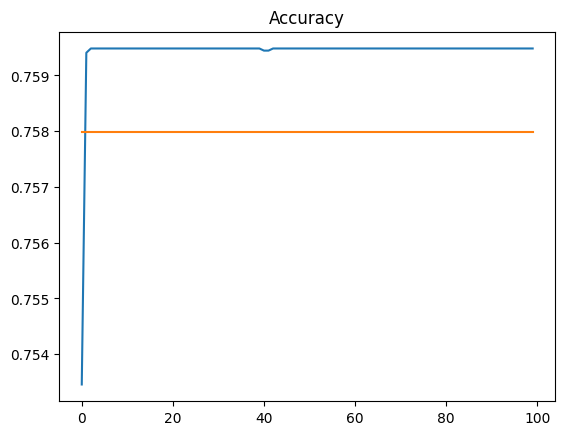

In [110]:
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='validationn accuracy')
plt.title('Accuracy')
plt.show()

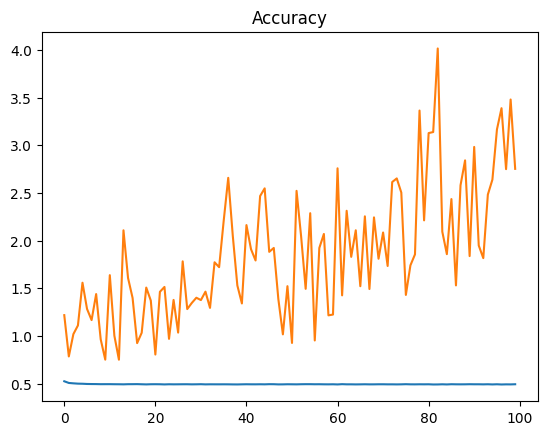

In [111]:
plt.plot(history.history['loss'], label='val loss')
plt.plot(history.history['val_loss'], label='validationn loss')
plt.title('Accuracy')
plt.show()

In [112]:
ann.evaluate(Xtest,ytest)

204/204 ━━━━━━━━━━━━━━━━━━━━ 0s 685us/step - AUC: 0.4893 - accuracy: 0.7582 - loss: 2.7402


[2.7528700828552246, 0.7579852342605591, 0.49057942628860474]

In [116]:
ypred = ann.predict(Xtestsc)
ypred

204/204 ━━━━━━━━━━━━━━━━━━━━ 0s 842us/step


array([[0.3625994 ],
       [0.35825816],
       [0.21052548],
       ...,
       [0.35316065],
       [0.01272751],
       [0.02522416]], dtype=float32)

In [117]:
from sklearn.metrics import classification_report
classification_report(ytest, ypred)

ValueError: Classification metrics can't handle a mix of binary and continuous targets